# Стохастический градиентный и координатный спуски

In [330]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

## Загрузка и подготовка данных (1 балл)

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [205]:
#ваш код 
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [206]:
#ваш код 
columns_name = list(df.columns)

In [207]:
#ваш код 
nulls = {}
for i in columns_name:
    nulls[i] = len(df[df[i].isna() == True])  
    
nulls

{'TV': 0, 'radio': 0, 'newspaper': 0, 'sales': 0}

> ### Вывод: пропусков не обранужено

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [208]:
#ваш код 
X_init = np.array(df.drop('sales', axis=1))
y_init  = np.array(df['sales'])

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [209]:
X = np.hstack([np.ones(X_init.shape[0]).reshape(-1, 1), X_init])
y = y_init.reshape(-1, 1)
print(X.shape, y.shape)


(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [210]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [211]:
num_iters = 1000           # количество итераций
m = 200                    # количество строк в X (объектов)
n = 4                      # количество признаков (столбцов в X)
w = np.zeros((1,n)).T

In [212]:
for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:, :k] @ w[:k] + X[:, k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2/(len(y))

print(f'Коэффициенты w: \n{w}')

Коэффициенты w: 
[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [45]:
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


 ### Вывод: 
> - выполнена функция координатного спуска, выведен вектор весов ***[w]*** модели линейной регрессии.
> - Выполнена проверка в sickit_learn - **веса совпадают**

Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [216]:
#ваш код

# Приводим датасет к матричному фиду, предварительно нормализовав признаки
Matrix_scal = np.array((df - df.mean())/df.std())


In [217]:
y = Matrix_scal[:,3]            # Целевой признак
X_scal = Matrix_scal[:,0:3]     # Признаки обучающей выборки

**Добавим единичный столбец**

In [218]:
X = np.hstack([np.ones(X_scal.shape[0]).reshape(-1, 1), X_scal])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [292]:
def mse_error(y, y_pred):
    mse = np.mean((y - y_pred) ** 2)        # Вычисление средней квадратичной ошибки
    return round(mse, 4)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [233]:
# Проностическая модель (наивная)

y_pred = np.full_like(y, fill_value=np.mean(y), dtype=float) # y_pred - замена средним значением

mse_error(y, y_pred)        # Функция средней квадратичной ошибки

mean squared error: 0.995


> ### Вывод: Средняя квадаратичная ошибка стремится в 1 - предсказания не соотвестсвуют реальным значениям

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [293]:
#ваш код
def lin_pred(X):
    w_hat = np.linalg.inv(X.T@X)@X.T@y      # вычислеине весов признаков 
    y_pred = (X@w_hat)                      # вектор прогнозов
    return w_hat, y_pred


print(f'Вектор w: {lin_pred(X)[0]}')
print(f'Вектор погнозов y_pred: {lin_pred(X)[1][:5]}...')

Вектор w: [-1.38777878e-17  7.53065912e-01  5.36481550e-01 -4.33068629e-03]
Вектор погнозов y_pred: [ 1.24610034 -0.32288629 -0.32867149  0.68526292 -0.15981506]...


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [263]:
train_ind = len(X)   # Количетсов индексов объекта обучающей выборки
eta = 0.01           # Шаг градиентного спуска
w = np.zeros([4])    # начальный вектор весов w

def stoch_grad_step(X, y, w, train_ind, eta):
    w = w
    for j in range(len(w)):                 # Цикл по стобцам j
        gradient = 0                        # Градиент
        for i in range(0, train_ind):       # Цикл по строками
            y_pred_i = (X[i]@w)             # Предсказание i-го элемента
            error = y_pred_i - y[i]         # ВЫчислеине ошибки
            gradient += X[i][j] * error                 # Обновление градиента
        w[j] = w[j] - (2 * eta / len(X)) * gradient     # Обновление веса w[j]
    return w

In [264]:
# Вызов функции
stoch_grad_step(X, y, w, train_ind, eta)

array([-3.67345043e-18,  1.55662661e-02,  1.14498512e-02,  4.44491962e-03])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [366]:
# Функция стохастического градиентного спуска

def stochastic_gradient_descent(X, y, w_init, eta, max_iter, eps):
    w = w_init.copy()                   # Начальный вектор w                
    w_list = []                         # w_list - полученные векторы на каждой итерации
    errors = []                         # Ошибка mse на каждой итерации
    distance = float('inf')             # Расстояние между векторами весов (бесконечность)
    iteration = 0                       # Счётчик итераций

    while iteration < max_iter and distance > eps:      # Ограничение цикла по счётчику итераций и евклидовому расстоянию eps
        i = np.random.randint(0, len(X))                # случайный индекс
        xi = X[i]                                       # Индексы обучающей выборки i-той строки
        yi = y[i]                                       # Индексы целевого признака i-той строки
        
        y_pred = xi@w                                   # предсказание i-го признака
        error = y_pred - yi                             # Вычислеине ошибки
        gradient = error * xi                           # Вычислеине градиента

        new_w = w - eta * gradient                      # Обновление весов w
        distance = np.linalg.norm(new_w - w)            # Расстояние между векторами w соседних итераций
        w_list.append(new_w)                            # Обновление списка векторов w на текущей итерации
        w = new_w                                       # Обновление весов w для следующей итерации

        # Среднеквадратичная ошибка на всех данных
        y_pred = X@w
        mse = mse_error(y_pred, y)
        errors.append(mse)

        iteration += 1

    return w, errors, iteration 

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [373]:
w, errs, iter = stochastic_gradient_descent(X, y, w_init = np.zeros([4]), eta=0.01, max_iter=10000, eps = 1e-06)
print(f'Вектор весов w: {w}')
print(f'Вектор ошибок: {errs[:4]}...')
print(f'Количество итераций: {iter}')

Вектор весов w: [-0.00552563  0.7377246   0.54252888 -0.03793677]
Вектор ошибок: [np.float64(0.9935), np.float64(0.9503), np.float64(0.9477), np.float64(0.9467)]...
Количество итераций: 4947


**Постройте график зависимости ошибки от номера итерации**

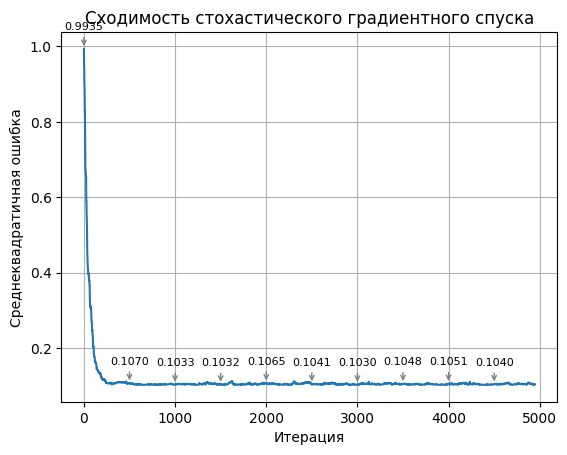

In [374]:
plt.plot(range(len(errs)), errs)
plt.xlabel("Итерация")
plt.ylabel("Среднеквадратичная ошибка")
plt.title("Сходимость стохастического градиентного спуска")
plt.grid(True)

# Проверяем МSE на каждой 500-й итерацией
for i in range(0, len(errs), 500):   
    
    # Создём выноски на кадом шаге
            
    plt.annotate(f"{errs[i]:.4f}",           
                 xy=(i, errs[i]),
                 xytext=(i, errs[i] + 0.05),  
                 textcoords='data',
                 arrowprops=dict(arrowstyle="->", color='gray'),
                 fontsize=8,
                 ha='center')

plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [375]:
# ваш код
print(w)

[-0.00552563  0.7377246   0.54252888 -0.03793677]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [376]:
# ваш код
print(f'Mean squared error: {float(mse_error(X@w, y))}')

Mean squared error: 0.1036


## Общие выводы:

1. Исследование данных на наличие пропусков - **пропусков не обнаружено**

2. Выполнена стандартизация признаков

 - выполнена функция координатного спуска, выведен вектор весов ***[w]*** модели линейной регрессии.
 - Выполнена проверка в sickit_learn - **веса совпадают**

3. Выполнен предварительный 'наивный' прогноз целевого признака (делевые признаки заменены средними занчениями) ---> **средняя квардратичная ошибка mse сремится к 1.**

4. Выполнена функция ***lin_pred***, возвращающая векторы весов *w* и прогноз целевого признака *y_pred*

5. Выполнена функция ***stoch_grad_step*** для реализации шага стохастического градиентного спуска

6. Выполнена функция ***stochastic_gradient_descent*** для реализации метода стохастического градиентного спуска со следующими параметрами:
 
        - Шаг *eta=0.01*, 
        - Максимальное количество итераций *max_iter=100000*, 
        - Минимальное евлидово расстояние *eps = 1e-06*

7. Выполнена визуализация стохастического градиентного спуска

8. Найдена средняя квадратичная ошибка на последей итерации MSE = 0.1036

***Для данного датасета следует уменьшить число итераций до 1000, так как цикл быстро находит оптимальное значение MSE***